In [1]:
# 1. 주민등록인구및 세대현황 파일을 데이터프레임으로 가져옵니다.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('202208_202208_주민등록인구및세대현황_월간.csv',encoding='cp949')
data.head(2)

행정구역 2022년08월_총인구수 2022년08월_세대수  2022년08월_세대당 인구  \
0     서울특별시  (1100000000)     9,488,454    4,472,975             2.12   
1  서울특별시 종로구 (1111000000)       143,499       73,866             1.94   

  2022년08월_남자 인구수 2022년08월_여자 인구수  2022년08월_남여 비율  
0       4,601,295       4,887,159            0.94  
1          69,408          74,091            0.94

In [4]:
data = pd.read_excel('202208_202208_주민등록인구및세대현황_월간.xlsx',header=2)
data.head(2)

행정기관코드        행정기관       총인구수        세대수  세대당 인구     남자 인구수     여자 인구수  \
0  1100000000     서울특별시    9,488,454  4,472,975    2.12  4,601,295  4,887,159   
1  1111000000  서울특별시 종로구     143,499     73,866    1.94     69,408     74,091   

   남여 비율  
0   0.94  
1   0.94

In [5]:
# 2.컬럼의 이름을 행정기관코드,행정구역,총인구수,세대수,세대당인구,남자,여자,남여비율 로 변경하세요

In [6]:
data.columns

Index(['행정기관코드', '행정기관', '총인구수', '세대수', '세대당 인구', '남자 인구수', '여자 인구수', '남여 비율'], dtype='object')

In [7]:
data.columns = ['행정기관코드', '행정구역', '총인구수', '세대수', '세대당인구', '남자', '여자', '남여비율']

In [8]:
data.head(1)

행정기관코드     행정구역       총인구수        세대수  세대당인구         남자         여자  \
0  1100000000  서울특별시    9,488,454  4,472,975   2.12  4,601,295  4,887,159   

   남여비율  
0  0.94

In [9]:
# 3. 남여비율 컬럼을 제거합니다.

In [10]:
data.drop(columns=['남여비율'],inplace=True)
data.head(1)

행정기관코드     행정구역       총인구수        세대수  세대당인구         남자         여자
0  1100000000  서울특별시    9,488,454  4,472,975   2.12  4,601,295  4,887,159

In [11]:
# 4. 행정구역 커럼을 이용해서 시,구,동 컬럼을 만들어 분리해 넣어줍니다. 
#  개별 데이터만 남기고  대분류,중분류에 해당하는 데이터는 삭제합니다.
#  부산지역의 값만 가지고 와서 인덱스를 새로 부여합니다.

In [12]:
data.행정구역

0                서울특별시  
1             서울특별시 종로구 
2        서울특별시 종로구 청운효자동
3          서울특별시 종로구 사직동
4          서울특별시 종로구 삼청동
              ...       
3860    제주특별자치도 서귀포시 서홍동
3861    제주특별자치도 서귀포시 대륜동
3862    제주특별자치도 서귀포시 대천동
3863    제주특별자치도 서귀포시 중문동
3864    제주특별자치도 서귀포시 예래동
Name: 행정구역, Length: 3865, dtype: object

In [13]:
data['행정구역'].str.split()

0                    [서울특별시]
1               [서울특별시, 종로구]
2        [서울특별시, 종로구, 청운효자동]
3          [서울특별시, 종로구, 사직동]
4          [서울특별시, 종로구, 삼청동]
                ...         
3860    [제주특별자치도, 서귀포시, 서홍동]
3861    [제주특별자치도, 서귀포시, 대륜동]
3862    [제주특별자치도, 서귀포시, 대천동]
3863    [제주특별자치도, 서귀포시, 중문동]
3864    [제주특별자치도, 서귀포시, 예래동]
Name: 행정구역, Length: 3865, dtype: object

In [14]:
data['시'] = data['행정구역'].str.split().str.get(0)
data['구'] = data['행정구역'].str.split().str.get(1)
data['동'] = data['행정구역'].str.split().str.get(2)

In [15]:
data.head(3)

행정기관코드             행정구역       총인구수        세대수  세대당인구         남자  \
0  1100000000          서울특별시    9,488,454  4,472,975   2.12  4,601,295   
1  1111000000       서울특별시 종로구     143,499     73,866   1.94     69,408   
2  1111051500  서울특별시 종로구 청운효자동     11,766      5,198   2.26      5,392   

          여자      시    구      동  
0  4,887,159  서울특별시  NaN    NaN  
1     74,091  서울특별시  종로구    NaN  
2      6,374  서울특별시  종로구  청운효자동

In [16]:
data.dropna(inplace=True)

In [17]:
data.head(3)

행정기관코드             행정구역    총인구수    세대수  세대당인구     남자     여자      시  \
2  1111051500  서울특별시 종로구 청운효자동  11,766  5,198   2.26  5,392  6,374  서울특별시   
3  1111053000    서울특별시 종로구 사직동   9,278  4,668   1.99  4,124  5,154  서울특별시   
4  1111054000    서울특별시 종로구 삼청동   2,384  1,188   2.01  1,130  1,254  서울특별시   

     구      동  
2  종로구  청운효자동  
3  종로구    사직동  
4  종로구    삼청동

In [18]:
busan = data[data['시']=='부산광역시']

In [19]:
busan.reset_index(drop=True,inplace=True)
busan.head(2)

행정기관코드          행정구역   총인구수    세대수  세대당인구     남자     여자      시   구    동
0  2611051000  부산광역시 중구 중앙동  3,139  2,435   1.29  1,475  1,664  부산광역시  중구  중앙동
1  2611052000  부산광역시 중구 동광동  2,590  1,703   1.52  1,323  1,267  부산광역시  중구  동광동

In [20]:
# 5. 총인구수, 남자, 여자 컬럼의 데이타 타입을 정수형으로 변경합니다.

In [21]:
busan['총인구수'] = busan['총인구수'].str.replace(',','').astype('int')
busan['남자'] = busan['남자'].str.replace(',','').astype('int')
busan['여자'] = busan['여자'].str.replace(',','').astype('int')

In [22]:
busan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   행정기관코드  205 non-null    int64  
 1   행정구역    205 non-null    object 
 2   총인구수    205 non-null    int32  
 3   세대수     205 non-null    object 
 4   세대당인구   205 non-null    float64
 5   남자      205 non-null    int32  
 6   여자      205 non-null    int32  
 7   시       205 non-null    object 
 8   구       205 non-null    object 
 9   동       205 non-null    object 
dtypes: float64(1), int32(3), int64(1), object(5)
memory usage: 13.7+ KB


In [23]:
# 6. 동별,구별 부산 인구를 차트로 표시합니다.(인구순 5개 동만)

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
busan_gu = busan.groupby('구')['총인구수'].sum().sort_values(ascending=False).head(5)
busan_gu = busan_gu.reset_index()
busan_gu

구    총인구수
0  해운대구  389841
1  부산진구  351682
2   사하구  304029
3    북구  280116
4   동래구  274638

<AxesSubplot:xlabel='구', ylabel='총인구수'>

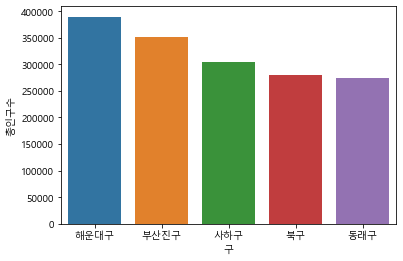

In [26]:
sns.barplot(data=busan_gu,x='구',y='총인구수')

In [33]:
busan_dong = busan.sort_values(by='총인구수',ascending=False).head(5)

<AxesSubplot:xlabel='동', ylabel='총인구수'>

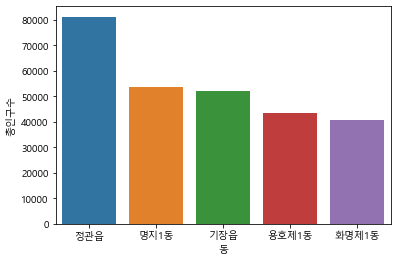

In [34]:
sns.barplot(data=busan_dong,x='동',y='총인구수')

In [61]:
# 7. 동별,구별 남,여 인구를 차트로 표시합니다.(인구순 5개 동만)

In [35]:
# 8. Choropleth,geojson을 이용하여 동별 인구수를 색상별로 지도에 표시하세요 

In [48]:
import json
jsonfile = open('HangJeongDong_ver20220401.geojson','r',encoding='utf-8').read()
jsondata = json.loads(jsonfile)

jsondata_busan = {"type": "FeatureCollection"}
jsondata_pick = []
jsondata_dong = []

for item in jsondata['features']:
    # print(item['properties']['sidonm'])
    if item['properties']['sidonm'] == '부산광역시':
        # print(item['properties']['adm_nm'])
        dong = item['properties']['adm_nm'].split()[-1].strip() 
        if dong == '가야제1동':
            dong = '가야1동'
        item['id'] = dong
        jsondata_dong.append(dong)
        jsondata_pick.append(item)
        
jsondata_busan['features'] = jsondata_pick
jsondata_busan

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'OBJECTID': 425,
    'adm_nm': '부산광역시 중구 중앙동',
    'adm_cd': '2101051',
    'adm_cd2': '2611051000',
    'sgg': '26110',
    'sido': '26',
    'sidonm': '부산광역시',
    'temp': '중구 중앙동',
    'sggnm': '중구',
    'adm_cd8': '21010510'},
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[129.04001607594367, 35.111424681629],
       [129.0427298111509, 35.110722158835344],
       [129.042347191582, 35.11034344765853],
       [129.0423152220015, 35.11029796763163],
       [129.041990699126, 35.10982871044188],
       [129.0414304709214, 35.109010295030885],
       [129.04088010913745, 35.10811134155702],
       [129.0445525636584, 35.10580584261088],
       [129.04373774886275, 35.10492439441351],
       [129.04036624750276, 35.10703056658817],
       [129.0398182034819, 35.10584181288945],
       [129.0399339281879, 35.10576888949396],
       [129.04367586047277, 35.103410637547064],
       [129.04224

In [49]:
import folium
busan_loc = [35.2144654,128.9805666]
m = folium.Map(busan_loc,zoom_start=11)
folium.Choropleth(geo_data = jsondata_busan,
                  data = busan,
                  columns=['동','총인구수'],
                  fill_color='YlGn',
                  key_on = 'feature.id').add_to(m)
m

In [50]:
json_dong = sorted(jsondata_dong)
json_dong

['가덕도동',
 '가락동',
 '가야1동',
 '가야2동',
 '감만1동',
 '감만2동',
 '감전동',
 '감천1동',
 '감천2동',
 '강동동',
 '개금1동',
 '개금2동',
 '개금3동',
 '거제1동',
 '거제2동',
 '거제3동',
 '거제4동',
 '광복동',
 '광안1동',
 '광안2동',
 '광안3동',
 '광안4동',
 '괘법동',
 '괴정1동',
 '괴정2동',
 '괴정3동',
 '괴정4동',
 '구서1동',
 '구서2동',
 '구평동',
 '구포1동',
 '구포2동',
 '구포3동',
 '금곡동',
 '금사회동동',
 '금성동',
 '기장읍',
 '남부민1동',
 '남부민2동',
 '남산동',
 '남천1동',
 '남천2동',
 '남포동',
 '남항동',
 '녹산동',
 '다대1동',
 '다대2동',
 '당감1동',
 '당감2동',
 '당감4동',
 '당리동',
 '대연1동',
 '대연3동',
 '대연4동',
 '대연5동',
 '대연6동',
 '대저1동',
 '대저2동',
 '대청동',
 '덕천1동',
 '덕천2동',
 '덕천3동',
 '덕포1동',
 '덕포2동',
 '동광동',
 '동대신1동',
 '동대신2동',
 '동대신3동',
 '동삼1동',
 '동삼2동',
 '동삼3동',
 '만덕1동',
 '만덕2동',
 '만덕3동',
 '망미1동',
 '망미2동',
 '명륜동',
 '명장1동',
 '명장2동',
 '명지1동',
 '명지2동',
 '모라1동',
 '모라3동',
 '문현1동',
 '문현2동',
 '문현3동',
 '문현4동',
 '민락동',
 '반송1동',
 '반송2동',
 '반여1동',
 '반여2동',
 '반여3동',
 '반여4동',
 '범일1동',
 '범일2동',
 '범일5동',
 '범천1동',
 '범천2동',
 '보수동',
 '복산동',
 '봉래1동',
 '봉래2동',
 '부곡1동',
 '부곡2동',
 '부곡3동',
 '부곡4동',
 '부민동',
 '부암1동',
 '부암3동',
 '부전1동',
 '부전2동',
 '부평동',

In [51]:
df_dong = sorted(busan['동'])
df_dong

['가덕도동',
 '가락동',
 '가야제1동',
 '가야제2동',
 '감만제1동',
 '감만제2동',
 '감전동',
 '감천제1동',
 '감천제2동',
 '강동동',
 '개금제1동',
 '개금제2동',
 '개금제3동',
 '거제제1동',
 '거제제2동',
 '거제제3동',
 '거제제4동',
 '광복동',
 '광안제1동',
 '광안제2동',
 '광안제3동',
 '광안제4동',
 '괘법동',
 '괴정제1동',
 '괴정제2동',
 '괴정제3동',
 '괴정제4동',
 '구서제1동',
 '구서제2동',
 '구평동',
 '구포제1동',
 '구포제2동',
 '구포제3동',
 '금곡동',
 '금사회동동',
 '금성동',
 '기장읍',
 '남부민제1동',
 '남부민제2동',
 '남산동',
 '남천제1동',
 '남천제2동',
 '남포동',
 '남항동',
 '녹산동',
 '다대제1동',
 '다대제2동',
 '당감제1동',
 '당감제2동',
 '당감제4동',
 '당리동',
 '대연제1동',
 '대연제3동',
 '대연제4동',
 '대연제5동',
 '대연제6동',
 '대저1동',
 '대저2동',
 '대청동',
 '덕천제1동',
 '덕천제2동',
 '덕천제3동',
 '덕포제1동',
 '덕포제2동',
 '동광동',
 '동대신제1동',
 '동대신제2동',
 '동대신제3동',
 '동삼제1동',
 '동삼제2동',
 '동삼제3동',
 '만덕제1동',
 '만덕제2동',
 '만덕제3동',
 '망미제1동',
 '망미제2동',
 '명륜동',
 '명장제1동',
 '명장제2동',
 '명지1동',
 '명지2동',
 '모라제1동',
 '모라제3동',
 '문현제1동',
 '문현제2동',
 '문현제3동',
 '문현제4동',
 '민락동',
 '반송제1동',
 '반송제2동',
 '반여제1동',
 '반여제2동',
 '반여제3동',
 '반여제4동',
 '범일제1동',
 '범일제2동',
 '범일제5동',
 '범천제1동',
 '범천제2동',
 '보수동',
 '복산동',
 '봉래제1동',
 '봉래제2동',
 '부곡제1동',


In [52]:
len(json_dong),len(df_dong)

(205, 205)

In [53]:
for i, item in enumerate(zip(df_dong,json_dong)):
    print(i,item)

0 ('가덕도동', '가덕도동')
1 ('가락동', '가락동')
2 ('가야제1동', '가야1동')
3 ('가야제2동', '가야2동')
4 ('감만제1동', '감만1동')
5 ('감만제2동', '감만2동')
6 ('감전동', '감전동')
7 ('감천제1동', '감천1동')
8 ('감천제2동', '감천2동')
9 ('강동동', '강동동')
10 ('개금제1동', '개금1동')
11 ('개금제2동', '개금2동')
12 ('개금제3동', '개금3동')
13 ('거제제1동', '거제1동')
14 ('거제제2동', '거제2동')
15 ('거제제3동', '거제3동')
16 ('거제제4동', '거제4동')
17 ('광복동', '광복동')
18 ('광안제1동', '광안1동')
19 ('광안제2동', '광안2동')
20 ('광안제3동', '광안3동')
21 ('광안제4동', '광안4동')
22 ('괘법동', '괘법동')
23 ('괴정제1동', '괴정1동')
24 ('괴정제2동', '괴정2동')
25 ('괴정제3동', '괴정3동')
26 ('괴정제4동', '괴정4동')
27 ('구서제1동', '구서1동')
28 ('구서제2동', '구서2동')
29 ('구평동', '구평동')
30 ('구포제1동', '구포1동')
31 ('구포제2동', '구포2동')
32 ('구포제3동', '구포3동')
33 ('금곡동', '금곡동')
34 ('금사회동동', '금사회동동')
35 ('금성동', '금성동')
36 ('기장읍', '기장읍')
37 ('남부민제1동', '남부민1동')
38 ('남부민제2동', '남부민2동')
39 ('남산동', '남산동')
40 ('남천제1동', '남천1동')
41 ('남천제2동', '남천2동')
42 ('남포동', '남포동')
43 ('남항동', '남항동')
44 ('녹산동', '녹산동')
45 ('다대제1동', '다대1동')
46 ('다대제2동', '다대2동')
47 ('당감제1동', '당감1동')
48 ('당감제2동', '당감2동')
49 ('당감제4동', '당감

In [57]:
busan['동'] = busan['동'].str.replace('제','')

In [59]:
busan['동'] = busan['동'].replace(['거1동','거2동','거3동','거4동'],['거제1동','거제2동','거제3동','거제4동'])

In [60]:
df_dong = sorted(busan['동'])
for i, item in enumerate(zip(df_dong,json_dong)):
    print(i,item)

0 ('가덕도동', '가덕도동')
1 ('가락동', '가락동')
2 ('가야1동', '가야1동')
3 ('가야2동', '가야2동')
4 ('감만1동', '감만1동')
5 ('감만2동', '감만2동')
6 ('감전동', '감전동')
7 ('감천1동', '감천1동')
8 ('감천2동', '감천2동')
9 ('강동동', '강동동')
10 ('개금1동', '개금1동')
11 ('개금2동', '개금2동')
12 ('개금3동', '개금3동')
13 ('거제1동', '거제1동')
14 ('거제2동', '거제2동')
15 ('거제3동', '거제3동')
16 ('거제4동', '거제4동')
17 ('광복동', '광복동')
18 ('광안1동', '광안1동')
19 ('광안2동', '광안2동')
20 ('광안3동', '광안3동')
21 ('광안4동', '광안4동')
22 ('괘법동', '괘법동')
23 ('괴정1동', '괴정1동')
24 ('괴정2동', '괴정2동')
25 ('괴정3동', '괴정3동')
26 ('괴정4동', '괴정4동')
27 ('구서1동', '구서1동')
28 ('구서2동', '구서2동')
29 ('구평동', '구평동')
30 ('구포1동', '구포1동')
31 ('구포2동', '구포2동')
32 ('구포3동', '구포3동')
33 ('금곡동', '금곡동')
34 ('금사회동동', '금사회동동')
35 ('금성동', '금성동')
36 ('기장읍', '기장읍')
37 ('남부민1동', '남부민1동')
38 ('남부민2동', '남부민2동')
39 ('남산동', '남산동')
40 ('남천1동', '남천1동')
41 ('남천2동', '남천2동')
42 ('남포동', '남포동')
43 ('남항동', '남항동')
44 ('녹산동', '녹산동')
45 ('다대1동', '다대1동')
46 ('다대2동', '다대2동')
47 ('당감1동', '당감1동')
48 ('당감2동', '당감2동')
49 ('당감4동', '당감4동')
50 ('당리동', '당리동')
51 ('대연1동', 

In [61]:
import folium
busan_loc = [35.2144654,128.9805666]
m = folium.Map(busan_loc,zoom_start=11)
folium.Choropleth(geo_data = jsondata_busan,
                  data = busan,
                  columns=['동','총인구수'],
                  fill_color='YlGn',
                  key_on = 'feature.id').add_to(m)
m